<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Need)</span></div>

## 1 Random Numbers

### 1.1 Real and Pseudo Random Numbers

### 1.2 NumPy’s PRNG

In [1]:
np.random.rand() 
# numbers generated will be between 0 and 1

0.09090335056402499

In [2]:
np.random.rand(10) 

array([0.2018518 , 0.88827184, 0.93807558, 0.69501771, 0.87383131,
       0.11755584, 0.32515096, 0.38082064, 0.19783691, 0.02905571])

In [3]:
np.random.rand(5,2)
# generate 5 sets of 2 numbers

array([[0.15142345, 0.32512018],
       [0.67665919, 0.21805696],
       [0.51035704, 0.73441743],
       [0.50033129, 0.23847682],
       [0.59197314, 0.42040567]])

In [8]:
n=10000
random_numbers=np.random.rand(n)

print(np.sum(random_numbers<0.5)/n*100)
# about 50% of the random numbers generated are less than 0.5

print(np.sum(random_numbers<0.25)/n*100)

np.sum(random_numbers>0.75)/n*100
# about 25% of the numbers generated are less than 0.25
# about 25% of the numbers generated are more than 0.75

# we can conclude that the numbers are uniformly generated

50.55
25.96


24.709999999999997

### 1.3 A simple graphical test

In [6]:
from matplotlib import pyplot as plt

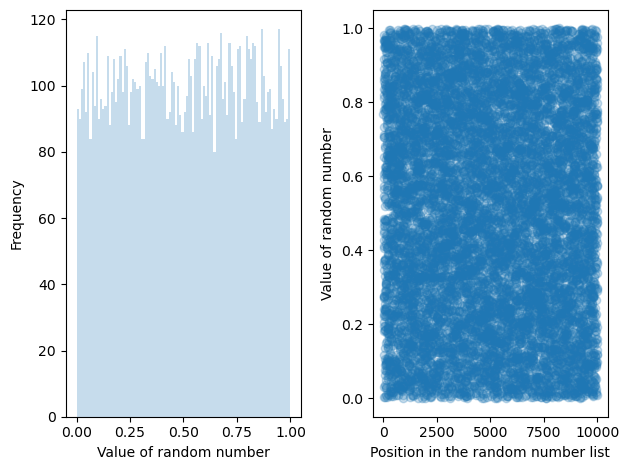

In [16]:
n = 10000
random_numbers = np.random.rand(n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25) # bins=bars in the histogram, in this case one bar for 0.00,0.01 etc
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

plt.tight_layout()
plt.show()

### 1.4 Uniformly beyond \([0,1)\)

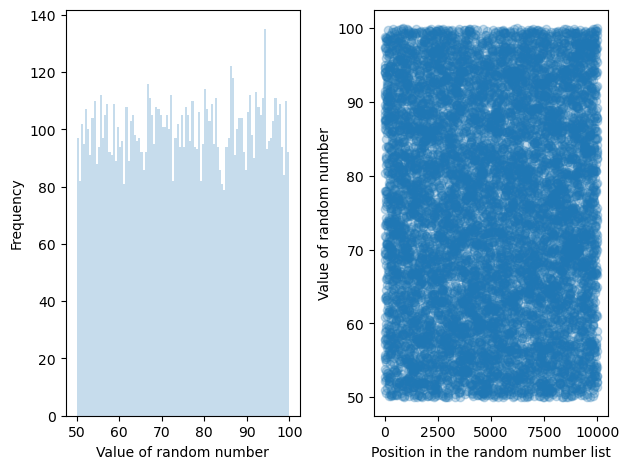

In [30]:
n = 10000
random_numbers = np.random.uniform(low=50, high=100, size=n) # generate 10000 numbers between 50 and 100

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25) # bins=bars in the histogram, in this case one bar for 0.00,0.01 etc
axis.set_xticks(np.arange(50,110,10))
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

plt.tight_layout()
plt.show()


### 1.5 ‘seeding’ a PRNG

In [47]:
print(np.random.randint(0, 100, 10))
# Ten integers between 0 and 100

np.random.randint(0, 100, 10)

[37 61 53 49 53 76 55 11  1 77]


array([30, 52, 99, 95, 61, 18, 46, 90, 63, 70])

In [34]:
np.random.seed(1234)
np.random.randint(0, 100, 10)
# Specifying a seed, seed #1234 will always generate this array
# when there is no previous seed value, it will use system time. how does this work?


array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

In [57]:
np.random.randint(1, 49, 6)

array([ 2, 36,  5, 13, 47, 38])

## 2 Simulating a Magic-8 Ball

In [63]:
def shake_magic_8():
    '''
    Function to simulate a Magic-8 ball!
    '''
    options = ['It is certain.', 'It is decidedly so.',
               'Without a doubt.', 'Yes definitely.',
               'You may rely on it.', 'As I see it, yes.',
               'Most likely.', 'Outlook good.',
               'Yes.', 'Signs point to yes.',
               'Reply hazy, try again.', 'Ask again later.',
               'Better not tell you now.', 'Cannot predict now.',
               'Concentrate and ask again.', 'Don\'t count on it.',
               'My reply is no.', 'My sources say no.',
               'Outlook not so good.', 'Very doubtful.']

    return np.random.choice(options)
help(shake_magic_8)

Help on function shake_magic_8 in module __main__:

shake_magic_8()
    Function to simulate a Magic-8 ball!



In [64]:
questions = ['Will I be pretty?',
             'Will I be rich?',
             'Will I be in trouble?']

for question in questions:
    print(f'Q: {question}')
    print(f'A: {shake_magic_8()}\n')

Q: Will I be pretty?
A: As I see it, yes.

Q: Will I be rich?
A: Yes definitely.

Q: Will I be in trouble?
A: Ask again later.



## 3 Flipping Coins

### 3.1 A fair coin

In [65]:
np.random.choice(['Head', 'Tails'])

'Head'

In [66]:
no_of_coins = 10
np.random.choice(['Head', 'Tails'], no_of_coins)
# 10 flips of a fair coin

array(['Head', 'Head', 'Tails', 'Head', 'Tails', 'Head', 'Tails', 'Tails',
       'Tails', 'Head'], dtype='<U5')

In [66]:
def flip_coins(no_of_coins=1, probability=.5):
    '''
    Returns the number of values greater than 
    `probability` (considered as 'Heads').
    '''
    results = np.random.rand(no_of_coins) # since no_of_coins=1, 1 random number will be generated
    no_of_heads = np.sum(results > probability)
    return no_of_heads

no_of_coins = 1_000 # the _ is just for readability purposes since cannot use comma or space
no_of_heads = flip_coins(no_of_coins) # flip 1000 coins, find percentage of heads
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%') # give percentage of heads as a float to 2dp

Number of heads: 52.40%


In [16]:
np.random.rand(5)

array([0.13756452, 0.55703563, 0.40791384, 0.08233755, 0.0768482 ])

### 3.2 A biased coin

In [41]:
no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins, probability = .3) # the threshold for flipping heads in lowered (anything higher than 0.3 is head)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')


Number of heads: 66.10%


### 3.3 A flipping experiment

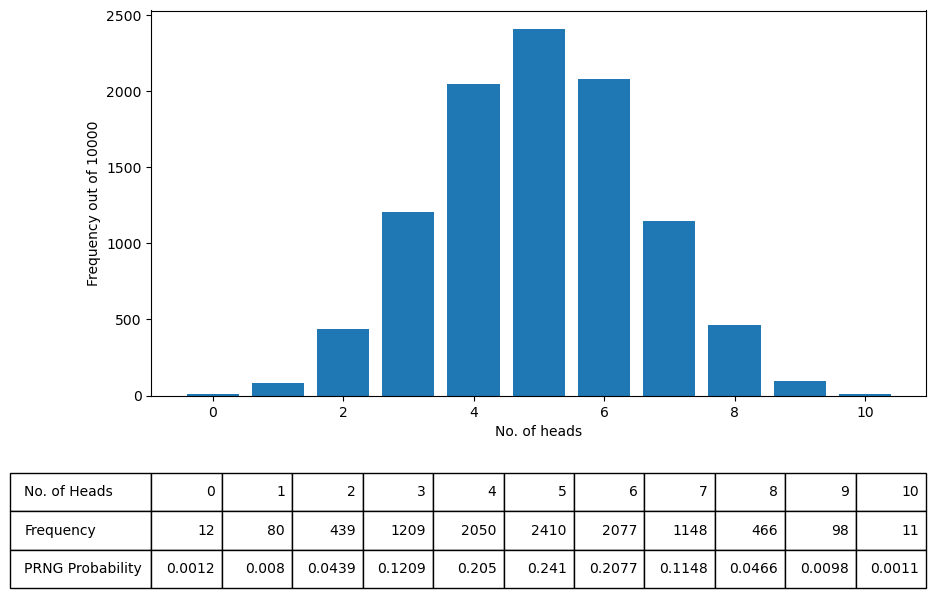

In [75]:
no_of_repeats = 10_000
result = [flip_coins(no_of_coins=10) for _ in range(no_of_repeats)]
no_of_heads, heads_counts = np.unique(result, return_counts=True) # return unique value of each heads and how many times it occurs

heads_probability = heads_counts/no_of_repeats

plt.rcParams['figure.figsize'] = (10,5)
plt.bar(no_of_heads, heads_counts);
plt.xlabel('No. of heads')
plt.ylabel(f'Frequency out of {no_of_repeats}')
plt.table([no_of_heads, heads_counts, heads_probability],
          rowLabels=['No. of Heads', 'Frequency', 'PRNG Probability'],
          loc='bottom',
          bbox=[0, -0.5, 1, 0.3])


In [1]:
from scipy.stats import binom

In [2]:
binom.pmf(k=7, n=10, p=.5) #what
# probability mass function - gives the probabilities for the various possibilities of discrete distributions (binom in this case)

0.11718749999999996

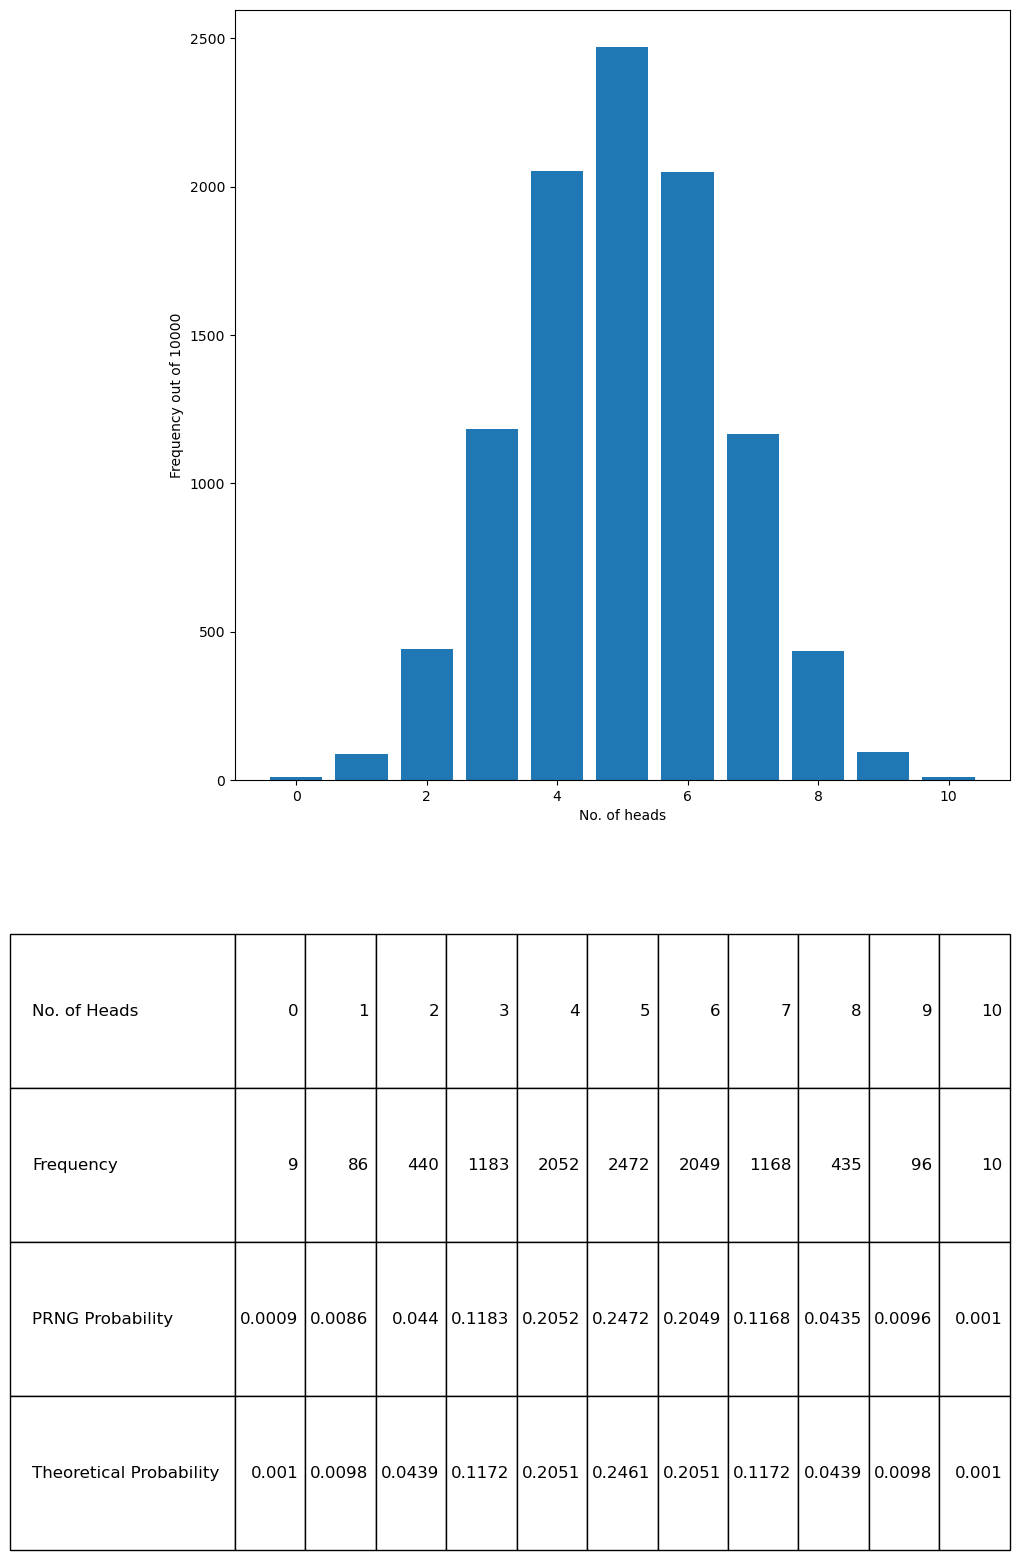

In [39]:
no_of_repeats = 10_000
result = [flip_coins(no_of_coins=10) for _ in range(no_of_repeats)]
no_of_heads, heads_counts = np.unique(result, return_counts=True) # return unique value of each heads and how many times it occurs

heads_probability = heads_counts/no_of_repeats
binomial_probabilities = binom.pmf(k=no_of_heads, n=10, p=.5)
binomial_probabilities = np.around(binomial_probabilities, 4) # round off the value to 4dp

plt.rcParams['figure.figsize'] = (10,10)
plt.bar(no_of_heads, heads_counts);
plt.xlabel('No. of heads')
plt.ylabel(f'Frequency out of {no_of_repeats}')
table = plt.table([no_of_heads, heads_counts, heads_probability, binomial_probabilities],
          rowLabels=['No. of Heads', 'Frequency', 'PRNG Probability', 'Theoretical Probability'],
          loc='bottom',
          bbox=[0, -1, 1, 0.8])
table.auto_set_font_size(False)
table.set_fontsize(12)

plt.show()

## Exercise 1 :  12C, 13C

In [128]:
def flip_carbon(no_of_carbon, probability = 0.9889):
    results = np.random.rand(no_of_carbon) 
    return results

C13=[]
for i in range(10):
    no_of_carbon = 27
    no_of_C13 = flip_carbon(no_of_carbon)
    flip_carbon(27)
    no_of_C13 = np.sum(flip_carbon(no_of_carbon) > 0.9889)
    C13.append(no_of_C13)
C13_array=np.array(C13)
print(C13_array)
mean_C13 = np.mean(C13_array)
print(f'Mean no. of C13 is {mean_C13}')
std_C13 = np.std(C13_array)
print(f'Standard deviation of C13 is {std_C13}')


[0 0 1 0 1 0 0 1 0 1]
Mean no. of C13 is 0.4
Standard deviation of C13 is 0.4898979485566356


In [127]:
array1=np.array([0,1,1,2,0])
print(np.mean(array1))
np.std(array1)

0.8


0.7483314773547883

In [155]:
C13_2=[]
for i in range(100):
    no_of_carbon = 27
    no_of_C13 = flip_carbon(no_of_carbon)
    flip_carbon(27)
    no_of_C13 = np.sum(flip_carbon(no_of_carbon) > 0.9889)
    C13_2.append(no_of_C13)

print(C13_2)
probability=C13_2.count(0)/len(C13_2)
print(f'The probability that a cholestrol molecule out of {len(C13_2)} has no atoms of C13 is {probability}')
                                                               

[0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 0, 2, 1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]
The probability that a cholestrol molecule out of 100 has no atoms of C13 is 0.72
